# Восстановление золота из руды

## Описание задачи

Подготовьте прототип модели машинного обучения для «Цифры».  
Компания разрабатывает решения для эффективной работы промышленных предприятий.  

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Используйте данные с параметрами добычи и очистки.

Чтобы выполнить проект, обращайтесь к библиотекам *pandas*, *matplotlib* и *sklearn.* Вам поможет их документация.

<b><i>Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды.</b></i>

## Подготовка данных

In [1]:

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.dummy import DummyRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor

###  Общая информация

In [2]:
def df_info(df):
    name = [x for x in globals() if globals()[x] is df][0]
    dubl = df.duplicated().sum()
    display(f">>> {name} <<<")
    display(df.head())
    df.info()
    if dubl:
        print(f'\nКоличество дубликатов: {dubl}')
    else:
        print(f'\nДубликатов нет')
    display(df.describe())
    print('\n——————————————————————————————————————————————————————————————————')

In [3]:
df_train = pd.read_csv('gold_recovery_train_new.csv')
df_test = pd.read_csv('gold_recovery_test_new.csv')
df_full = pd.read_csv('gold_recovery_full_new.csv')

Наименование признаков должно быть такое:  
`[этап].[тип_параметра].[название_параметра]`  
Пример: `rougher.input.feed_ag`  

Возможные значения для блока `[этап]`:

* `rougher` — флотация
* `primary_cleaner` — первичная очистка
* `secondary_cleaner` — вторичная очистка
* `final` — финальные характеристики

Возможные значения для блока `[тип_параметра]`:

* `input` — параметры сырья
* `output` — параметры продукта
* `state` — параметры, характеризующие текущее состояние этапа
* `calculation` — расчётные характеристики

In [4]:
df_info(df_train)
df_info(df_test)
df_info(df_full)

'>>> df_train <<<'

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14149 non-null  object 
 1   final.output.concentrate_ag                         14148 non-null  float64
 2   final.output.concentrate_pb                         14148 non-null  float64
 3   final.output.concentrate_sol                        13938 non-null  float64
 4   final.output.concentrate_au                         14149 non-null  float64
 5   final.output.recovery                               14149 non-null  float64
 6   final.output.tail_ag                                14149 non-null  float64
 7   final.output.tail_pb                                14049 non-null  float64
 8   final.output.tail_sol                               14144 non-null  float64


,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,14148.000000,14148.000000,13938.000000,14149.000000,14149.000000,14149.000000,14049.000000,14144.000000,14149.000000,14129.000000,...,14143.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148.000000,14147.000000,14148.000000
mean,5.142034,10.132960,9.202849,44.003792,66.518832,9.607035,2.597298,10.512122,2.918421,133.320659,...,19.985454,-478.696836,15.487065,-460.229416,16.775136,-483.956022,13.064590,-483.966564,19.577539,-506.798480
std,1.369586,1.654930,2.790516,4.905261,10.295402,2.319069,0.971843,3.003617,0.903712,39.431659,...,5.657723,50.736021,5.255655,58.843586,5.831906,37.892788,5.765617,39.207913,5.764417,37.079249
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003112,...,0.000000,-799.709069,0.000000,-799.889113,-0.372054,-797.142475,0.646208,-800.006180,0.195324,-809.398668
25%,4.211620,9.297355,7.484645,43.276111,62.545817,7.997429,1.905973,8.811324,2.368607,107.006651,...,14.990775,-500.628656,11.894558,-500.149000,11.083980,-500.363177,8.994405,-500.105994,14.989304,-500.745104
50%,4.994652,10.297144,8.845462,44.872436,67.432775,9.480270,2.592022,10.514621,2.851025,133.018328,...,20.001789,-499.681450,14.975536,-499.388738,17.932223,-499.702452,11.997547,-499.914556,19.984175,-500.061431
75%,5.859540,11.170603,10.487508,46.166425,72.346428,11.003707,3.241723,11.933009,3.434764,159.825396,...,24.990826,-477.472413,20.059375,-400.039008,21.346550,-487.712108,17.982903,-453.186936,24.991623,-499.536466
max,16.001945,17.031899,18.124851,52.756638,100.000000,19.552149,5.639565,22.317730,8.197408,250.127834,...,30.115735,-245.239184,24.007913,-145.071088,43.709931,-275.073125,27.926001,-157.396071,32.188906,-104.427459



——————————————————————————————————————————————————————————————————


'>>> df_test <<<'

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5290 non-null   object 
 1   primary_cleaner.input.sulfate               5286 non-null   float64
 2   primary_cleaner.input.depressant            5285 non-null   float64
 3   primary_cleaner.input.feed_size             5290 non-null   float64
 4   primary_cleaner.input.xanthate              5286 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 10  primary_clea

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,5286.000000,5285.000000,5290.000000,5286.000000,5.290000e+03,5290.000000,5.290000e+03,5290.000000,5.290000e+03,5290.000000,...,5.290000e+03,5290.000000,5.290000e+03,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000
mean,174.839652,8.683596,7.266339,1.383803,1.539494e+03,-497.665883,1.545174e+03,-500.273098,1.527272e+03,-498.330680,...,1.632007e+01,-505.144570,1.373544e+01,-463.349858,12.804186,-501.329122,9.881145,-495.663398,17.304935,-501.793193
std,43.027080,3.072050,0.610219,0.643474,1.167979e+02,19.952431,1.222246e+02,32.968307,1.225380e+02,21.964876,...,3.493583e+00,31.427337,3.430484e+00,86.189107,3.026591,17.951495,2.868205,34.535007,4.536544,39.044215
min,2.566156,0.003839,5.650000,0.004984,5.445860e-32,-795.316337,6.647490e-32,-799.997015,4.033736e-32,-799.960571,...,1.079872e-16,-799.798523,2.489718e-17,-800.836914,0.069227,-797.323986,0.528083,-800.220337,-0.079426,-809.741464
25%,147.121401,6.489555,6.890000,0.907623,1.498936e+03,-500.357298,1.498971e+03,-500.703002,1.473230e+03,-501.018117,...,1.403618e+01,-500.868258,1.202862e+01,-500.323028,10.914838,-500.726841,8.036719,-500.194668,13.997317,-500.690984
50%,177.828489,8.052207,7.250000,1.197610,1.585129e+03,-499.969164,1.595622e+03,-500.028514,1.549595e+03,-500.017711,...,1.700847e+01,-500.115727,1.496486e+01,-499.576513,12.954182,-499.990332,10.004301,-499.990535,16.014935,-500.007126
75%,208.125438,10.027764,7.600000,1.797819,1.602077e+03,-499.568951,1.602324e+03,-499.293257,1.601144e+03,-498.994130,...,1.803862e+01,-499.404224,1.596213e+01,-400.933805,15.097528,-499.283191,11.997467,-499.719913,21.020013,-499.373018
max,265.983123,40.000000,15.500000,4.102454,2.103104e+03,-57.195404,1.813084e+03,-142.527229,1.715054e+03,-150.937035,...,3.005180e+01,-401.565212,3.126971e+01,-6.506986,25.258848,-244.483566,14.086866,-137.740004,26.705889,-123.307487



——————————————————————————————————————————————————————————————————


'>>> df_full <<<'

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   final.output.concentrate_ag                         19438 non-null  float64
 2   final.output.concentrate_pb                         19438 non-null  float64
 3   final.output.concentrate_sol                        19228 non-null  float64
 4   final.output.concentrate_au                         19439 non-null  float64
 5   final.output.recovery                               19439 non-null  float64
 6   final.output.tail_ag                                19438 non-null  float64
 7   final.output.tail_pb                                19338 non-null  float64
 8   final.output.tail_sol                               19433 non-null  float64


,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,19438.000000,19438.000000,19228.000000,19439.000000,19439.000000,19438.000000,19338.000000,19433.000000,19439.000000,19415.000000,...,19433.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19437.000000,19438.000000
mean,5.168470,9.978895,9.501224,44.076513,67.050208,9.688589,2.705795,10.583728,3.042467,144.624774,...,18.987674,-485.894516,15.010366,-461.078636,15.694452,-488.684065,12.198224,-487.149827,18.959024,-505.436305
std,1.372348,1.669240,2.787537,5.129784,10.125840,2.328642,0.949077,2.868782,0.922808,44.464071,...,5.411058,47.758570,4.890228,67.405524,5.510974,34.533396,5.333024,38.347312,5.550498,37.689057
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003112,...,0.000000,-799.798523,0.000000,-800.836914,-0.372054,-797.323986,0.528083,-800.220337,-0.079426,-809.741464
25%,4.251240,9.137262,7.722820,43.402215,63.299712,8.062878,2.040119,8.938947,2.461138,114.107029,...,14.975734,-500.704892,11.940294,-500.187742,10.988606,-500.458467,8.971105,-500.129462,14.983037,-500.728067
50%,5.066094,10.102433,9.218961,45.011244,68.172738,9.743623,2.748730,10.622456,2.984909,143.232103,...,18.017481,-499.837793,14.971014,-499.459786,15.000036,-499.802605,11.019433,-499.935317,19.960541,-500.048400
75%,5.895527,11.035769,10.947813,46.275313,72.686642,11.134294,3.333216,12.104271,3.571351,175.075656,...,23.012470,-498.249730,19.034162,-400.118106,18.026190,-498.384187,14.019088,-499.436708,24.003170,-499.495378
max,16.001945,17.031899,19.615720,52.756638,100.000000,19.552149,5.804178,22.317730,8.245022,265.983123,...,30.115735,-245.239184,31.269706,-6.506986,43.709931,-244.483566,27.926001,-137.740004,32.188906,-104.427459



——————————————————————————————————————————————————————————————————


### Эффективность обогащения

На обучающей выборке для признака `rougher.output.recovery`.  
`MAE` между расчётами и значением признака  

* C — доля золота в концентрате после флотации/очистки;  
* F — доля золота в сырье/концентрате до флотации/очистки;  
* T — доля золота в отвальных хвостах после флотации/очистки.  

In [5]:
C = df_train['rougher.output.concentrate_au']
F = df_train['rougher.input.feed_au']
T = df_train['rougher.output.tail_au']
target = df_train['rougher.output.recovery']
recovery = (C * (F - T)) / (F * (C - T)) * 100
mae = mean_absolute_error(target, recovery)
print(f'Средняя абсолютная ошибка (MAE): {mae * 1e15:.2f} × 10⁻¹⁵')

Средняя абсолютная ошибка (MAE): 9.74 × 10⁻¹⁵


* Средняя абсолютная ошибка крайне мала, эффективность обогощения рассчитывается верно.<br>

### Анализ признаков, недоступных в тестовой выборке

In [6]:
diff = list(set(df_train) - set(df_test))
train_test_diff = pd.DataFrame(diff).sort_values(by=0).reset_index(drop=True).rename(
    columns={0: 'Отсутствующие в тестовой выборке признаки'}
)
train_test_diff

,Отсутствующие в тестовой выборке признаки
0,final.output.concentrate_ag
1,final.output.concentrate_au
2,final.output.concentrate_pb
3,final.output.concentrate_sol
4,final.output.recovery
5,final.output.tail_ag
6,final.output.tail_au
7,final.output.tail_pb
8,final.output.tail_sol
9,primary_cleaner.output.concentrate_ag


* В тестовой выборке отсутствуют параметры продукта (`output`) и расчётные характеристики (`calculation`).<br>

### Предобработка данных

#### Столбец `date` к нужному формату

Дата — единственный формат, по которому можно сделать индекс.  
Индексы каждого датасета не перекликаются между собой.  

In [7]:
df_train['date'] = pd.to_datetime(df_train['date'], format='%Y-%m-%d %H:%M:%S')
df_full['date'] = pd.to_datetime(df_full['date'], format='%Y-%m-%d %H:%M:%S')
df_test['date'] = pd.to_datetime(df_test['date'], format='%Y-%m-%d %H:%M:%S')
df_train = df_train.set_index(pd.DatetimeIndex(df_train['date']))
df_full = df_full.set_index(pd.DatetimeIndex(df_full['date']))
df_test = df_test.set_index(pd.DatetimeIndex(df_test['date']))

#### Обработка пропусков

#####  Исходные данные

In [8]:
display(df_full.isna().sum().sort_values(ascending=False).head(10))
print(f'Максимальное количество пропусков: '
      f'{df_full.isna().sum().sort_values(ascending=False)[0] / len(df_full):.0%}')

secondary_cleaner.output.tail_sol           1748
rougher.input.floatbank11_xanthate           453
rougher.state.floatbank10_e_air              436
primary_cleaner.output.concentrate_sol       370
secondary_cleaner.state.floatbank2_a_air     220
final.output.concentrate_sol                 211
rougher.input.feed_size                      145
primary_cleaner.output.concentrate_pb        116
primary_cleaner.input.xanthate               104
final.output.tail_pb                         101
dtype: int64

Максимальное количество пропусков: 9%


In [9]:
df_full = df_full.interpolate(method='time')
df_full.isna().sum().sort_values(ascending=False).head(3)

date                               0
rougher.state.floatbank10_b_air    0
rougher.state.floatbank10_f_air    0
dtype: int64

In [10]:
full_target_rougher = df_full['rougher.output.recovery']
full_target_final = df_full['final.output.recovery']
full_features = df_full.drop(['rougher.output.recovery', 'final.output.recovery'], axis=1)

#####  Тренировочная выборка

In [11]:
display(df_train.isna().sum().sort_values(ascending=False).head(10))
print(f'Максимальное количество пропусков: '
      f'{df_train.isna().sum().sort_values(ascending=False)[0] / len(df_train):.0%}')

secondary_cleaner.output.tail_sol           1605
rougher.state.floatbank10_e_air              436
rougher.input.floatbank11_xanthate           428
primary_cleaner.output.concentrate_sol       286
secondary_cleaner.state.floatbank2_a_air     217
final.output.concentrate_sol                 211
rougher.input.feed_size                      144
primary_cleaner.input.xanthate               100
rougher.input.feed_pb                        100
final.output.tail_pb                         100
dtype: int64

Максимальное количество пропусков: 11%


In [12]:
df_train = df_train.interpolate(method='time')
df_train.isna().sum().sort_values(ascending=False).head(3)

date                               0
rougher.state.floatbank10_b_air    0
rougher.state.floatbank10_f_air    0
dtype: int64

In [13]:
train_target_rougher = df_train['rougher.output.recovery']
train_target_final = df_train['final.output.recovery']
train_features = df_train.drop(['rougher.output.recovery', 'final.output.recovery'], axis=1)

#####  Тестовая выборка

In [14]:
display(df_test.isna().sum().sort_values(ascending=False).head(3))
print(f'Максимальное количество пропусков: '
      f'{df_test.isna().sum().sort_values(ascending=False)[0] / len(df_test):.3%}')

rougher.input.floatbank11_xanthate          25
rougher.input.feed_sol                      21
secondary_cleaner.state.floatbank3_a_air     9
dtype: int64

Максимальное количество пропусков: 0.473%


In [15]:
df_test = df_test.interpolate(method='time')
df_test.isna().sum().sort_values(ascending=False).head(3)

date                               0
rougher.state.floatbank10_c_air    0
rougher.state.floatbank10_d_air    0
dtype: int64

In [16]:
df_test[['rougher.output.recovery', 'final.output.recovery']] = df_full[
    ['rougher.output.recovery', 'final.output.recovery']]

In [17]:
test_target_rougher = df_test['rougher.output.recovery']
test_target_final = df_test['final.output.recovery']
test_features = df_test.drop(['rougher.output.recovery', 'final.output.recovery', 'date'], axis=1)

***
<a name="2_conclusion"></a>
### Вывод

* Средняя абсолютная ошибка крайне мала, эффективность обогощения рассчитывается верно.
* В тестовой выборке отсутствуют параметры продукта (`output`) и расчётные характеристики (`calculation`).  
    В том числе целевые признаки: `rougher.output.recovery` и `final.output.recovery`.  
    Их можно восстановить из исходных данных.<br><br>
***

## Анализ данных

### Концентрация металлов (Au, Ag, Pb) на различных этапах очистки

In [18]:
param_list = ['rougher.input.feed_', 'rougher.output.concentrate_', 'primary_cleaner.output.concentrate_',
              'final.output.concentrate_']
au_concentrate = full_features[[f'{param}au' for param in param_list]]
ag_concentrate = full_features[[f'{param}ag' for param in param_list]]
pb_concentrate = full_features[[f'{param}pb' for param in param_list]]

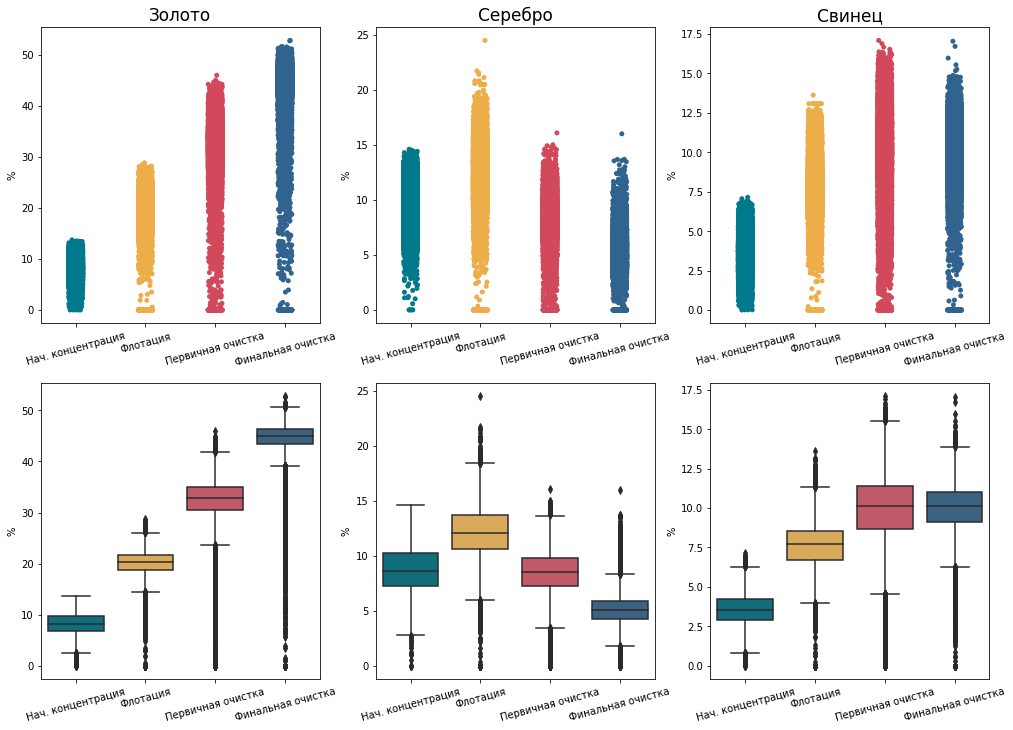

In [19]:


fig, axes = plt.subplots(2, 3, figsize=(17, 12))
palette = ['#00798C', '#EDAE49', '#D1495B', '#30638E']  # 30638E, 003D5B
labels = ['Нач. концентрация', 'Флотация', 'Первичная очистка', 'Финальная очистка']

sns.stripplot(data=au_concentrate, ax=axes[0, 0], palette=palette)
axes[0, 0].set_title('Золото', fontsize=17)
axes[0, 0].set_ylabel('%')
axes[0, 0].set_xticklabels(labels, rotation=15)

sns.stripplot(data=ag_concentrate, ax=axes[0, 1], palette=palette)
axes[0, 1].set_title('Серебро', fontsize=17)
axes[0, 1].set_ylabel('%')
axes[0, 1].set_xticklabels(labels, rotation=15)

sns.stripplot(data=pb_concentrate, ax=axes[0, 2], palette=palette)
axes[0, 2].set_title('Свинец', fontsize=17)
axes[0, 2].set_ylabel('%')
axes[0, 2].set_xticklabels(labels, rotation=15)

sns.boxplot(data=au_concentrate, ax=axes[1, 0], palette=palette)
axes[1, 0].set_ylabel('%')
axes[1, 0].set_xticklabels(labels, rotation=15)

sns.boxplot(data=ag_concentrate, ax=axes[1, 1], palette=palette)
axes[1, 1].set_ylabel('%')
axes[1, 1].set_xticklabels(labels, rotation=15)

sns.boxplot(data=pb_concentrate, ax=axes[1, 2], palette=palette)
axes[1, 2].set_ylabel('%')
axes[1, 2].set_xticklabels(labels, rotation=15)

plt.show()

* С каждым этапом концентрация `золота` увеличивается.  
* На этапе флотации концентрация `серебра` увеличилась, а после стала снижаться.  
    После флотации, вероятно, есть возможность получать и `серебро`.  
* Нет чёткой зависимости концентрации `свинца` от этапа очистки.  

### Сравнение распределения размеров гранул сырья на обучающей и тестовой выборках

Если распределения сильно отличаются друг от друга, оценка модели будет неправильной.

In [20]:
rougher_feed_size = pd.concat([train_features['rougher.input.feed_size'], df_test['rougher.input.feed_size']], axis=1)
rougher_feed_size.columns = ['train', 'test']
rougher_feed_size.describe()

,train,test
count,14149.000000,5290.000000
mean,60.033541,55.952835
std,23.099655,19.080372
min,9.659576,0.046369
25%,48.913889,43.906504
50%,55.269784,50.846843
75%,65.982466,62.451165
max,484.967466,392.494040


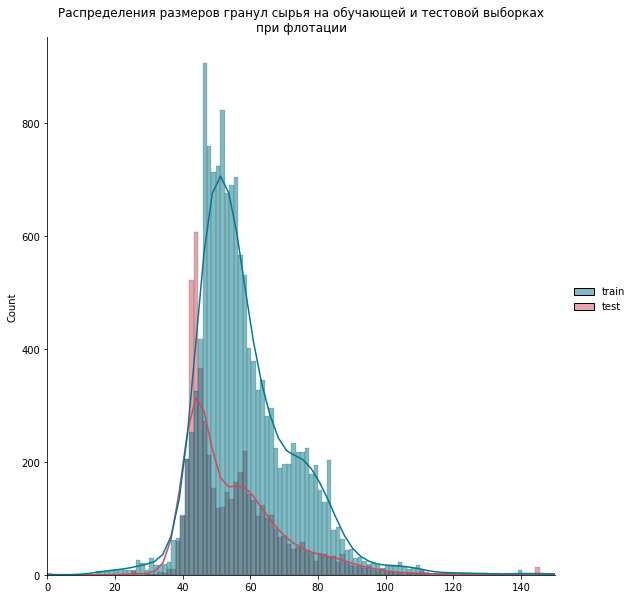

In [21]:
sns.displot(rougher_feed_size, kde=True, height=8, palette=['#00798C', '#D1495B'])
plt.title('Распределения размеров гранул сырья на обучающей и тестовой выборках\nпри флотации')
plt.xlim([0, 150])
plt.show()

In [22]:
primary_feed_size = pd.concat([
    train_features['primary_cleaner.input.feed_size'],
    df_test['primary_cleaner.input.feed_size']
], axis=1)
primary_feed_size.columns = ['train', 'test']
primary_feed_size.describe()

,train,test
count,14149.000000,5290.000000
mean,7.322310,7.266339
std,0.614062,0.610219
min,1.080000,5.650000
25%,6.960000,6.890000
50%,7.290000,7.250000
75%,7.700000,7.600000
max,10.470000,15.500000


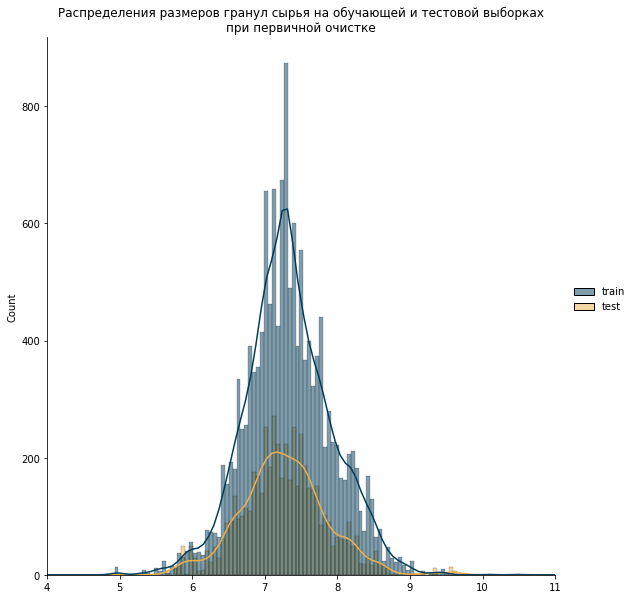

In [23]:
sns.displot(primary_feed_size, kde=True, height=8, palette=['#003D5B', '#EDAE49'])
plt.title('Распределения размеров гранул сырья на обучающей и тестовой выборках\nпри первичной очистке')
plt.xlim([4, 11])
plt.show()

* Распределенре размера гранул сырья в обучающей и тестовой выборках очень похожи.  
  Влияния на оценку модели не будет.

### Суммарная концентрация всех веществ на разных стадиях
В сырье, в черновом и финальном концентратах. 

In [24]:
df_full['feedstock'] = df_full[[
    'rougher.input.feed_ag', 'rougher.input.feed_pb',
    'rougher.input.feed_sol', 'rougher.input.feed_au'
]].sum(axis=1)
df_full['output_stock'] = df_full[[
    'rougher.output.concentrate_ag', 'rougher.output.concentrate_pb',
    'rougher.output.concentrate_sol', 'rougher.output.concentrate_au'
]].sum(axis=1)
df_full['primary_stock'] = df_full[[
    'primary_cleaner.output.concentrate_ag', 'primary_cleaner.output.concentrate_pb',
    'primary_cleaner.output.concentrate_sol', 'primary_cleaner.output.concentrate_au'
]].sum(axis=1)
df_full['final_stock'] = df_full[[
    'final.output.concentrate_ag', 'final.output.concentrate_pb',
    'final.output.concentrate_sol', 'final.output.concentrate_au'
]].sum(axis=1)

sum_concentration = df_full[['feedstock', 'output_stock', 'primary_stock', 'final_stock']]
sum_concentration.describe()

,feedstock,output_stock,primary_stock,final_stock
count,19439.000000,19439.000000,19439.000000,19439.000000
mean,57.318892,68.174751,60.764379,68.659392
std,7.211533,12.485095,10.014820,7.422649
min,0.040000,0.000000,0.000000,0.000000
25%,53.552406,66.015877,58.926178,67.934878
50%,57.587818,70.181987,62.498575,69.599462
75%,61.953459,74.358248,65.666701,71.368472
max,76.978947,88.140119,80.749343,80.210644


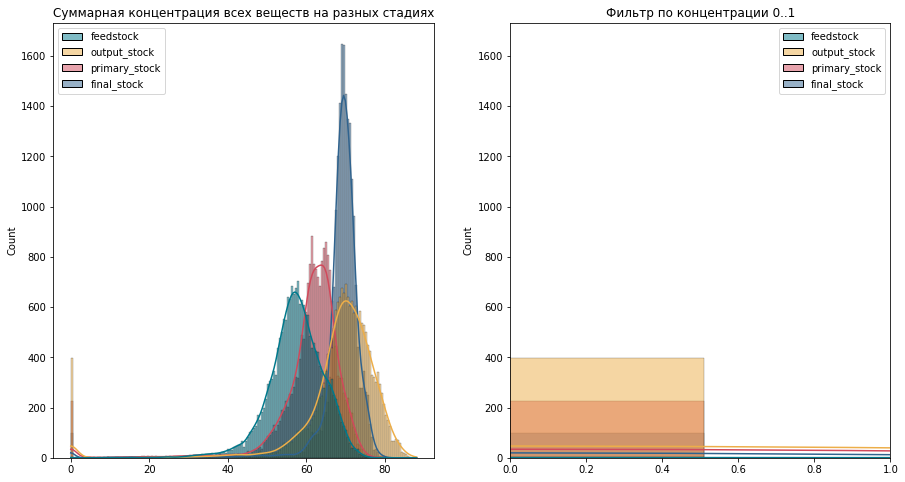

In [25]:
fig, axes = plt.subplots(1, 2, figsize=(15, 8))
palette = ['#00798C', '#EDAE49', '#D1495B', '#30638E']
sns.histplot(sum_concentration, kde=True, palette=palette, ax=axes[0])
axes[0].set_title('Суммарная концентрация всех веществ на разных стадиях')
sns.histplot(sum_concentration, kde=True, ax=axes[1], palette=palette)
axes[1].set_title('Фильтр по концентрации 0..1')
plt.xlim([0, 1])
plt.show()

In [26]:
len_null_objects = sum_concentration.query(
    'output_stock == 0 or primary_stock == 0 or final_stock == 0'
)['feedstock'].count()
len_0_1_objects = sum_concentration.query(
    'output_stock != 0 and primary_stock != 0 and final_stock != 0' +
    'and output_stock < 1 or primary_stock < 1 or final_stock < 1'
)['feedstock'].count()
print(f'Количество данных с нулевой концентрацией веществ на том или ином этапе:\n    '
      f'{len_null_objects} ({len_null_objects / len(sum_concentration):.3%})')
print(f'Количество данных с концентрацией в диапозоне 0..1:\n    '
      f'{len_0_1_objects} ({len_0_1_objects / len(sum_concentration):.3%})')

Количество данных с нулевой концентрацией веществ на том или ином этапе:
    591 (3.040%)
Количество данных с концентрацией в диапозоне 0..1:
    328 (1.687%)


Суммарная концентрация должна быть выше нуля до и после флотации, после первичной очистки и в финальных харарктеристиках.  
Если концентрация равна нулю, данные бесполезны, их можно удалить.  
Данные в диапозоне 0..1 легитимны, но ими можно пренебречь, так как их объём менее 2%.  

In [27]:
df_full = df_full.query('output_stock > 1 and primary_stock > 1 and final_stock > 1')


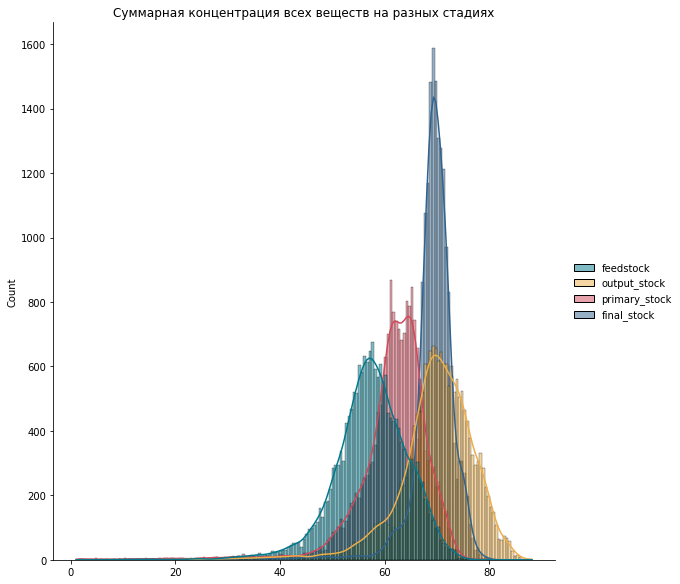

In [28]:
sns.displot(
    df_full[['feedstock', 'output_stock', 'primary_stock', 'final_stock']],
    kde=True, height=8, palette=palette
)
plt.title('Суммарная концентрация всех веществ на разных стадиях')
plt.show()

***
<a name="3_conclusion"></a>
### Вывод

* С каждым этапом концентрация `золота` увеличивается.
* На этапе флотации концентрация `серебра` увеличилась, а после стала снижаться.  
  После флотации, вероятно, есть возможность получать и `серебро`.
* Нет чёткой зависимости концентрации `свинца` от этапа очистки.
* Разброс значений каждого элемента уменьшается с каждым этапом очистки.  
  При этом на каждом этапе много «выбросов».
* Распределенре размера гранул сырья в обучающей и тестовой выборках очень похожи.  
  Влияния на оценку модели не будет.
* Убраны нерелевантные данные, исходя из выбросов по концентрации веществ.<br><br>
***

## Модель

### Функция для вычисления итоговой sMAPE

In [29]:
train_features = train_features[test_features.columns]


def smape(target, predicted):
    result = (abs(predicted - target) / ((abs(target) + abs(predicted)) / 2)).sum() / len(target)
    return result


scorer = make_scorer(smape)


def final_smape(model):
    rougher_cvs = cross_val_score(model, train_features, train_target_rougher, scoring=scorer)
    rougher_cvs_mean = rougher_cvs.mean()
    rougher_cvs_std = rougher_cvs.std()
    final_cvs = cross_val_score(model, train_features, train_target_final, scoring=scorer)
    final_cvs_mean = final_cvs.mean()
    final_cvs_std = final_cvs.std()
    result = 0.25 * rougher_cvs_mean + 0.75 * final_cvs_mean
    return result

### Модели и оценка их качества кросс-валидацией

#### Проверка на адекватность

In [30]:
model = DummyRegressor(strategy='mean')

model.fit(train_features, train_target_rougher)
pred_rougher = model.predict(test_features)
model.fit(train_features, train_target_final)
pred_final = model.predict(test_features)
sm_rougher = smape(test_target_rougher, pred_rougher).mean()
sm_final = smape(test_target_final, pred_final).mean()

result = 0.25 * sm_rougher + 0.75 * sm_final
print(f'Наименьшая симметричная средняя абсолютная ошибка (sMAPE): {result:.3%}\n'
      f'У финальной модели ошибка должна быть меньше')

Наименьшая симметричная средняя абсолютная ошибка (sMAPE): 10.290%
У финальной модели ошибка должна быть меньше


#### Модель линейной регрессии

In [31]:
model = LinearRegression()
result = final_smape(model)
print(f'Наименьшая симметричная средняя абсолютная ошибка (sMAPE): {result:.2%}')

Наименьшая симметричная средняя абсолютная ошибка (sMAPE): 12.37%


#### Модель регрессии дерева решений

In [32]:
model = DecisionTreeRegressor(random_state=12345)
result = final_smape(model)
print(f'Наименьшая симметричная средняя абсолютная ошибка (sMAPE): {result:.2%}')

Наименьшая симметричная средняя абсолютная ошибка (sMAPE): 22.62%


#### Модель случайного леса

In [33]:
best_final_smape = 1
best_depth = 0
best_estimators = 0
for depth in range(4, 5):
    for est in range(20, 21):
        model = RandomForestRegressor(random_state=12345, n_estimators=est, max_depth=depth)
        final_smape_ = final_smape(model)
        if abs(final_smape_) < abs(best_final_smape):
            best_depth = depth
            best_estimators = est
            best_final_smape = final_smape_
print(
    f'Наиболее подходящая глубина: {best_depth}\n'
    f'Наиболее подходящее количество «деревьев»: {best_estimators}\n'
    f'Наименьшая симметричная средняя абсолютная ошибка (sMAPE): {best_final_smape:.2%}'
)

Наиболее подходящая глубина: 4
Наиболее подходящее количество «деревьев»: 20
Наименьшая симметричная средняя абсолютная ошибка (sMAPE): 10.49%


#### Оценка модели случайного «леса» на тестовой выборке

In [34]:
final_model = RandomForestRegressor(random_state=12345, n_estimators=20, max_depth=4)

final_model.fit(train_features, train_target_rougher)
pred_rougher = final_model.predict(test_features)

final_model.fit(train_features, train_target_final)
pred_final = final_model.predict(test_features)

sm_rougher = smape(test_target_rougher, pred_rougher).mean()
sm_final = smape(test_target_final, pred_final).mean()

result = 0.25 * sm_rougher + 0.75 * sm_final
print(f'Cимметричная средняя абсолютная ошибка (sMAPE): {result:.3%}')

Cимметричная средняя абсолютная ошибка (sMAPE): 9.808%


## Общий вывод

* Почему-то при кросс-валидации подобрались параметры:  
    `n_estimators = 18`, `depth = 5`;  
    подбирались более 12 часов в диапазонах `depth 1..15`, `n_estimators 1..51`  
    Почему-то показывают худшие показатели на тестовой выборке, чем подобранные вручную (`n_estimators = 20`, `depth = 4`).  
* <b>Разница между проверочной моделью и финальной моделью на тестовых данных ≈ 0,5%.</b>  
    Это не очень много, пробовал разные методы заполнения пропусков: `.fillna()`, `.ffill()`, `.interpolate()`.  
    Но улучшить показатели не получилось (параметры в течение 12 часов подбирались только один раз).  
    Возможно, что если дольше подбирать параметры заполнения пропусков и параметры модели, то получится уменьшить ошибку.  
    Возможно, стоит добиться наличия утраченных признаков в тестовой выборке, если это возможно.
